# Project: "Movies Trivia"

### Table of Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dw">Data Wrangling</a></li>
<li><a href="#analysis">Exploratory Analysis</a></li>
<li><a href="#con">Conclusion</a></li>


<a id='intro'></a>
## Introduction:

>#### Following Analysis is based on imdb database of 10K movies released between January 1960 and September 2015. It consists of columns like user rating, budget, revenue etc.

>#### Some of the questions that can be answered from the analysis are:
1. What is the average budget, revenue and runtime of a movie?
2. what is the most and least profitable movie?
3. what is the highest and lowest rated movie?
4. what is the highest and lowest revenue generating movie?
5. what is the highest and lowest budget movie?
6. what is the movie with highest and shortest runtime?
7. What are the metrics of a successful movie?
8. what is the most profitable genre of movies?
9. what is the most profitable star cast?
10. what is the most profitable production company?
12. Are more produced now than earlier?
12. Which year saw maximum numbers of movies released?
13. Which year saw maximum numbers of profitable movies released?
14. Are high budget movies more profitable then low budget movies?

<a id='dw'></a>
## Data Wrangling:

>After observing the dataset and proposed questions, we'll be creating or editing relevant columns from the data. Few important steps followed in data wrangling part of this analysis are:
1. Removed un-neccessary variables
2. Removed duplicate rows
3. Converted release_date from string to date
4. Changed format of budget and revenue columns


>#### Couple of Assumptions about the data:
1. Budget and revenue numbers do not have a specified currency so we assumed it to be consistent, let's take that as US Dollars ($)
2. Runtime doesn't have any unit of measurement so it is assumed to be "minutes"
3. Lot of string variables are not required for the analysis hence they will be dropped from the data
4. Release data column will be converted from object to Date
5. Column "popularity" is used to assess popularity of the movie (in ascending order) 
6. Column "vote_average" is used as ratings for a movie
7. Out of the 2 columns present for budget & revenue, first ones are taken respectively

In [238]:
#importing important files 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [329]:
#loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
tmdb_data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1392445893.0
1,76341,tt1392190,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,348161292.5


In [240]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [241]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0
mean,66064.2,0.6,14625701.1,39823319.8,102.1,217.4,6.0,2001.3,17551039.8,51364363.3
std,92130.1,1.0,30913213.8,117003486.6,31.4,575.6,0.9,12.8,34306155.7,144632485.0
min,5.0,0.0,0.0,0.0,0.0,10.0,1.5,1960.0,0.0,0.0
25%,10596.2,0.2,0.0,0.0,90.0,17.0,5.4,1995.0,0.0,0.0
50%,20669.0,0.4,0.0,0.0,99.0,38.0,6.0,2006.0,0.0,0.0
75%,75610.0,0.7,15000000.0,24000000.0,111.0,145.8,6.6,2011.0,20853251.1,33697095.7
max,417859.0,33.0,425000000.0,2781505847.0,900.0,9767.0,9.2,2015.0,425000000.0,2827123750.0


In [327]:
tmdb_data[tmdb_data.budget==0].head(2)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,profit_perc
30,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6,2015,29355203,inf
36,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6,2015,22354572,inf


##### Noticed that there are lot of rows (more than 50%) where budget or revenue is zero.
>##### Not dropping the rows with either budget or revenue as zero because the other columns for these rows have meaningful and usable information, so making an assumption on lowest value for budget and revenue to be 1000.
>##### Popularity will be dropped as a column since mean value is 0.6 only and doesn't seem to be usable.
>##### Another dataframe is created for budget and revenue calculations 

In [243]:
df=tmdb_data[tmdb_data.budget<1000]
df.count()

id                      5755
imdb_id                 5745
popularity              5755
budget                  5755
revenue                 5755
original_title          5755
cast                    5688
homepage                1247
director                5715
tagline                 3529
keywords                4579
overview                5751
runtime                 5755
genres                  5733
production_companies    4856
release_date            5755
vote_count              5755
vote_average            5755
release_year            5755
budget_adj              5755
revenue_adj             5755
dtype: int64

#### 1. Dropping un-neccessary variables

In [330]:
#creating a list of colums to be deleted
del_cols=[ 'id', 'imdb_id', 'popularity','budget_adj', 'revenue_adj', 'homepage', 'overview','keywords','tagline']

#deleting the columns
tmdb_data= tmdb_data.drop(del_cols,1)

#previewing the new dataset
tmdb_data.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015


#### 2. Removing Duplicates

In [245]:
#Removing duplicate rows
tmdb_data.drop_duplicates(keep ='first', inplace=True)
tmdb_data.shape

(10865, 12)

In [246]:
# Checking for missings rows but since columns used in calculations (budget & revenue) 
# do not have any missings so not dropping any rows
tmdb_data.isnull().sum()

budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### 3. converting release_date column to date

In [247]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])
tmdb_data.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


#### 4. Changing format of budget, revenue, popularity and vote_average columns

In [248]:
change_cols=['budget', 'revenue','vote_average']
#changing data type
tmdb_data[change_cols]=tmdb_data[change_cols].applymap(np.int64)
#printing the changed information
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null int64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 1.1+ MB


In [249]:
# changing display of numerical columns to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#### 5. Creating a separate dataframe with values>1000

In [250]:
#creating separate dataframe for budget and revenue calculations
num_data=tmdb_data[(tmdb_data.budget>1000) & (tmdb_data.revenue>1000)]
num_data.shape

(3819, 12)

<a id='analysis'></a>
## Exploratory Analysis:

In [251]:
#Calculating profit for each movie
num_data['profit']=num_data['revenue']-num_data['budget']
num_data['profit_perc']=(num_data['profit']/num_data['budget'])*100
num_data.shape

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(3819, 14)

The dataset is reduced to 3,819 rows from 10,865 in previous

#### Question 1 - What is the average budget, revenue and runtime of a movie?

In [252]:
num_data.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_perc
count,3819.0,3819.0,3819.0,3819.0,3819.0,3819.0,3819.0,3819.0
mean,37462018.2,108640982.3,109.3,531.6,5.7,2001.3,71178964.1,1021.7
std,42262678.4,177054104.9,19.8,882.9,0.8,11.3,151104306.6,26398.1
min,6000.0,1938.0,26.0,10.0,2.0,1960.0,-413912431.0,-100.0
25%,10000000.0,14163246.0,96.0,72.0,5.0,1995.5,-1286002.5,-11.8
50%,24000000.0,45892212.0,106.0,206.0,6.0,2004.0,20451307.0,112.6
75%,50000000.0,125561662.5,119.0,583.0,6.0,2010.0,82790810.0,320.9
max,425000000.0,2781505847.0,338.0,9767.0,8.0,2015.0,2544505847.0,1288938.7


Average Budget of a movie is 24,000,000 while 
Average Revenue of a movie is 45,892,212

In [257]:
# Calculating profit for entire dataset as well to view as part of results for analysis on other columns
tmdb_data['profit']=tmdb_data['revenue']-tmdb_data['budget']
tmdb_data['profit_perc']=(tmdb_data['profit']/tmdb_data['budget'])*100
tmdb_data.shape

(10865, 14)

In [258]:
tmdb_data.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_perc
count,10865.0,10865.0,10865.0,10865.0,10865.0,10865.0,10865.0,6164.0
mean,14624286.1,39826896.1,102.1,217.4,5.5,2001.3,25202610.0,inf
std,30914284.6,117008277.5,31.4,575.6,1.0,12.8,96591029.8,nan
min,0.0,0.0,0.0,10.0,1.0,1960.0,-413912431.0,-100.0
25%,0.0,0.0,90.0,17.0,5.0,1995.0,0.0,-86.1
50%,0.0,0.0,99.0,38.0,6.0,2006.0,0.0,89.8
75%,15000000.0,24000000.0,111.0,146.0,6.0,2011.0,9092453.0,579.3
max,425000000.0,2781505847.0,900.0,9767.0,9.0,2015.0,2544505847.0,inf


Average runtime of a movie is 99 minutes

#### Defining a function which will calculate Highest & Lowest values of different columns

In [259]:
# declaring variables to view in results everytime
cols=['original_title', 'release_date', 'genres', 'director','revenue', 'budget', 'profit', 'profit_perc','vote_average','runtime']


def top_low(data, var, top_text, low_text):
    
    # Top movie
    top=(data.sort_values(by=var, ascending=False).head(1))[cols].reset_index(drop=True)
    top.set_index([[top_text]*len(top)], inplace=True)

    # Low movie
    low=(data.sort_values(by=var, ascending=True).head(1))[cols].reset_index(drop=True)
    low.set_index([[low_text]*len(low)], inplace=True)

    final=top.append(low)
    return final

#### Question 2 - Most and least Profitable movies?

In [260]:
top_low(num_data, 'profit_perc', 'Most Profitable Movie', 'Least Profitable Movie')

,original_title,release_date,genres,director,revenue,budget,profit,profit_perc,vote_average,runtime
Most Profitable Movie,Paranormal Activity,2007-09-14,Horror|Mystery,Oren Peli,193355800,15000,193340800,1288938.7,6,86
Least Profitable Movie,Death Defying Acts,2007-09-13,Drama|Romance,Gillian Armstrong,3561,20000000,-19996439,-100.0,5,97


#### Question 3 - Highest and lowest rated movies?

In [261]:
top_low(tmdb_data, 'vote_average', 'Highest Rated Movie', 'Least Rated Movie')

,original_title,release_date,genres,director,revenue,budget,profit,profit_perc,vote_average,runtime
Highest Rated Movie,The Story of Film: An Odyssey,2011-09-03,Documentary,Mark Cousins,0,0,0,nan,9,900
Least Rated Movie,Manos: The Hands of Fate,1966-11-15,Horror,Harold P. Warren,0,19000,-19000,-100.0,1,74


#### Question 4 - Highest and lowest revenue generating movies?

In [262]:
top_low(num_data, 'revenue', 'Highest Grossing Movie', 'Least Grossing Movie')

,original_title,release_date,genres,director,revenue,budget,profit,profit_perc,vote_average,runtime
Highest Grossing Movie,Avatar,2009-12-10,Action|Adventure|Fantasy|Science Fiction,James Cameron,2781505847,237000000,2544505847,1073.6,7,162
Least Grossing Movie,Best Man Down,2012-10-20,Comedy|Drama,Ted Koland,1938,1500000,-1498062,-99.9,5,90


#### Question 5 - Highest and lowest budget movies?

In [263]:
top_low(num_data, 'budget', 'Highest Budget Movie', 'Least Budget Movie')

,original_title,release_date,genres,director,revenue,budget,profit,profit_perc,vote_average,runtime
Highest Budget Movie,The Warrior's Way,2010-12-02,Adventure|Fantasy|Action|Western|Thriller,Sngmoo Lee,11087569,425000000,-413912431,-97.4,6,100
Least Budget Movie,Loose Change: Final Cut,2007-11-11,Documentary,Dylan Avery,6000,6000,0,0.0,5,129


#### Question 6 - Movies with longest and shortest run time?

In [264]:
top_low(num_data, 'runtime', 'Longest running Movie', 'Shortest running Movie')

,original_title,release_date,genres,director,revenue,budget,profit,profit_perc,vote_average,runtime
Longest running Movie,Carlos,2010-05-19,Crime|Drama|Thriller|History,Olivier Assayas,871279,18000000,-17128721,-95.2,6,338
Shortest running Movie,Mickey's Christmas Carol,1983-10-19,Family|Animation,Burny Mattinson,21000000,3000000,18000000,600.0,7,26


### Subsetting profitable movies for further analysis

In [265]:
num_data.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_perc
count,3819.0,3819.0,3819.0,3819.0,3819.0,3819.0,3819.0,3819.0
mean,37462018.2,108640982.3,109.3,531.6,5.7,2001.3,71178964.1,1021.7
std,42262678.4,177054104.9,19.8,882.9,0.8,11.3,151104306.6,26398.1
min,6000.0,1938.0,26.0,10.0,2.0,1960.0,-413912431.0,-100.0
25%,10000000.0,14163246.0,96.0,72.0,5.0,1995.5,-1286002.5,-11.8
50%,24000000.0,45892212.0,106.0,206.0,6.0,2004.0,20451307.0,112.6
75%,50000000.0,125561662.5,119.0,583.0,6.0,2010.0,82790810.0,320.9
max,425000000.0,2781505847.0,338.0,9767.0,8.0,2015.0,2544505847.0,1288938.7


In [266]:
# Deciling profit to calculate cutoffs
pd.DataFrame(np.percentile(num_data['profit_perc'], np.arange(0,100,10)).tolist())

,0
0,-100.0
1,-69.0
2,-31.3
3,10.0
4,58.9
5,112.6
6,173.0
7,258.8
8,401.0
9,747.6


In [267]:
#selecting the movies having profit of 50% or more based on median value of profit_perc
profit_data =  num_data[num_data['profit_perc'] >= 50]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(2)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,profit_perc
1,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6,2015,1363528810,909.0
2,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7,2015,228436354,152.3


#### Question 7 - What are the metrics of a successful movie?

In [326]:
profit_data.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_perc
count,2357.0,2357.0,2357.0,2357.0,2357.0,2357.0,2357.0,2357.0
mean,40368051.0,160383184.4,110.4,742.2,5.9,2000.3,120015133.5,1675.7
std,46052114.6,207336970.1,20.3,1041.1,0.8,12.3,174623259.6,33588.2
min,7000.0,101236.0,26.0,10.0,3.0,1960.0,84236.0,50.0
25%,10000000.0,39321715.0,96.0,138.0,5.0,1993.0,24492759.0,132.6
50%,25000000.0,93375151.0,106.0,359.0,6.0,2004.0,60810728.0,248.6
75%,55000000.0,194564672.0,121.0,868.0,6.0,2010.0,140663859.0,526.3
max,380000000.0,2781505847.0,248.0,9767.0,8.0,2015.0,2544505847.0,1288938.7


Average Budget of profitable movies is 40mn while
Average Revenue earned by profitable movies is 160mn thereby making a profit of 120mn which is around 300% return on investment

#### Defining a function which splits the data by '|' and displays a chart with number of movies

In [336]:
#function which will take any column as argument from and keep its track 
def data(data_val, column, title):
    #will take a column, and separate the string by '|'
    data = data_val[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False).head(10)
    
    count.sort_values(ascending = True, inplace = True)

    #ploting
    lt = count.plot.barh(color = 'red', fontsize = 13)

    #title
    lt.set(title = title)

    # on x axis
    lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

    #figure size(width, height)
    lt.figure.set_size_inches(12, 9)

    #ploting the graph
    plt.show()
    return count

#### Question 8 - Most profitable Genre of movies?

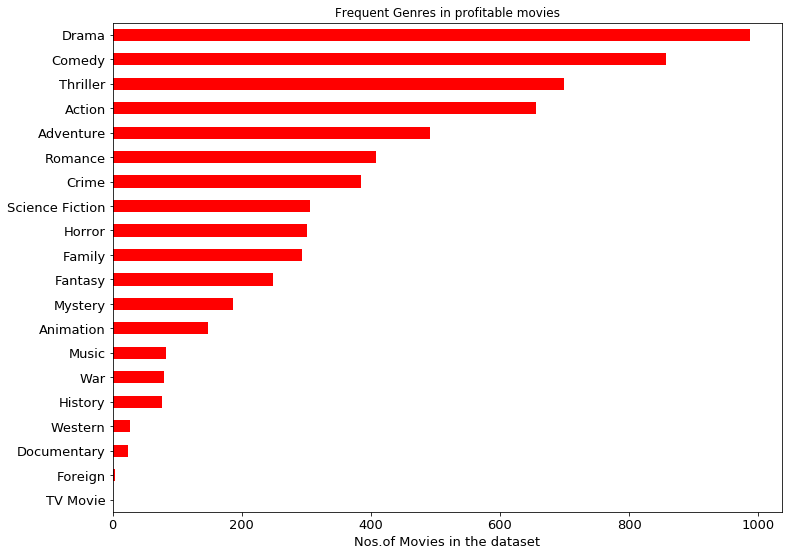

In [312]:
count = data(profit_data,'genres', 'Frequent Genres in profitable movies')

#### Question 9 - Most profitable star Cast ?

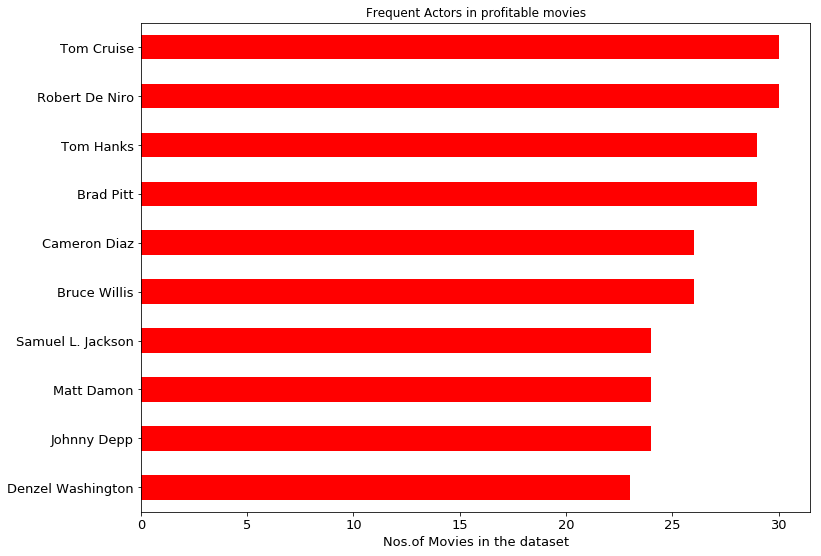

In [337]:
count = data(profit_data, 'cast', 'Frequent Actors in profitable movies')

#### Question 10 - Most profitable production companies ?

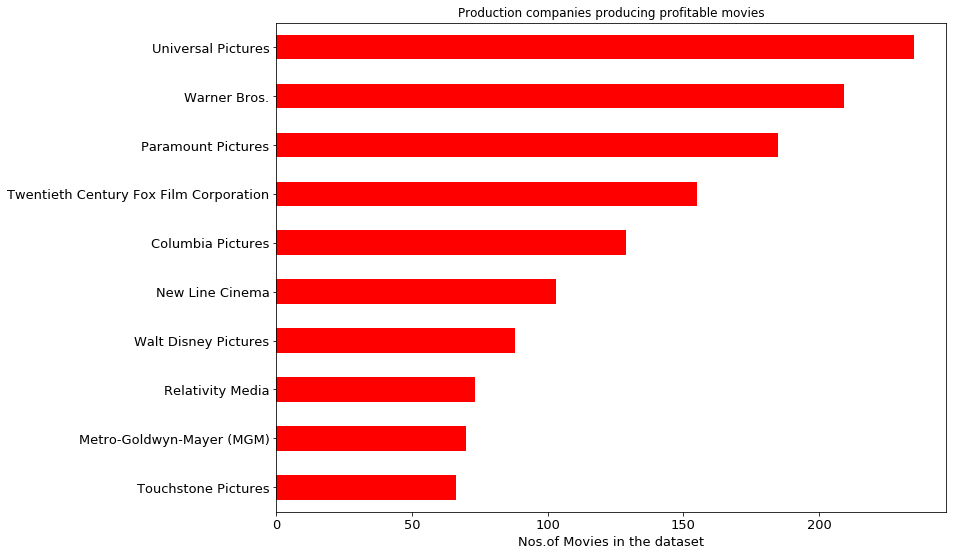

In [338]:
count = data(profit_data, 'production_companies', 'Production companies producing profitable movies')

#### Question 11 - Are more movies produced now than earlier years?

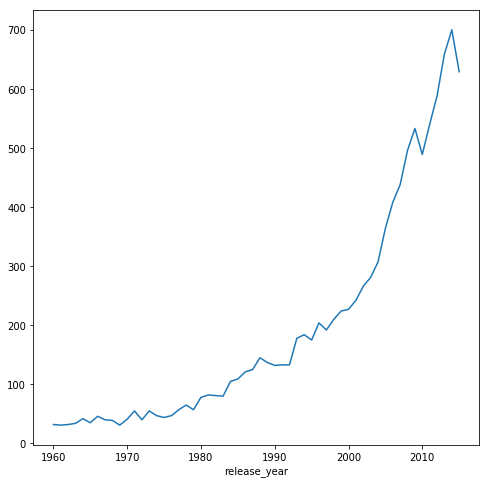

In [275]:
# counting number of releases per year
releases=tmdb_data.groupby(by=['release_year'])['original_title'].count()
# plotting the count
mv=releases.plot(kind='line',figsize=(8,8))

Yes, number of movies made is increasing every successive year

#### Question 12 - Which year saw maximum number of movies made?

In [288]:
release_df=pd.DataFrame(releases).reset_index()
release_df.head(2)

,release_year,original_title
0,1960,32
1,1961,31


In [293]:
max_yr_ind=release_df['original_title'].idxmax()
max_yr=release_df.loc[max_yr_ind].at['release_year']
max_nbr=release_df.loc[max_yr_ind].at['original_title']

print(max_yr, "saw maximum number of movies releasing -",max_nbr, "movies")

2014 saw maximum number of movies releasing - 700 movies


#### Question 13 - Which year saw maximum number of profitable movies made?

In [299]:
count=pd.DataFrame(profit_data.groupby(by=['release_year'])['original_title'].count()).reset_index()
count.head(2)

,release_year,original_title
0,1960,5
1,1961,8


In [301]:
max_yr_ind=count['original_title'].idxmax()
max_yr=count.loc[max_yr_ind].at['release_year']
max_nbr=count.loc[max_yr_ind].at['original_title']

print(max_yr, "saw maximum number of profitable movies -",max_nbr, "movies")

2011 saw maximum number of profitable movies - 118 movies


#### Question 14 - Are high budget movies more profitable than low budget movies?

In [331]:
profit_data.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_perc
count,2357.0,2357.0,2357.0,2357.0,2357.0,2357.0,2357.0,2357.0
mean,40368051.0,160383184.4,110.4,742.2,5.9,2000.3,120015133.5,1675.7
std,46052114.6,207336970.1,20.3,1041.1,0.8,12.3,174623259.6,33588.2
min,7000.0,101236.0,26.0,10.0,3.0,1960.0,84236.0,50.0
25%,10000000.0,39321715.0,96.0,138.0,5.0,1993.0,24492759.0,132.6
50%,25000000.0,93375151.0,106.0,359.0,6.0,2004.0,60810728.0,248.6
75%,55000000.0,194564672.0,121.0,868.0,6.0,2010.0,140663859.0,526.3
max,380000000.0,2781505847.0,248.0,9767.0,8.0,2015.0,2544505847.0,1288938.7


In [332]:
# Creating deciles of data based on budget
pd.DataFrame(np.percentile(profit_data['budget'], np.arange(0,100,10)).tolist())

,0
0,7000.0
1,3000000.0
2,6500000.0
3,12000000.0
4,17000000.0
5,25000000.0
6,32000000.0
7,45000000.0
8,65000000.0
9,100000000.0


In [333]:
# creating bins based on 30th and 70th decile 
# so that proportion is 30%, 40% and 30% when dividing movies between High, Medium and Low budget budget

bins=[0, 12000000, 45000000, 380000000]
labels=['Low', 'Medium', 'High']
profit_data['budget_group']= pd.cut(profit_data['budget'], bins=bins, labels=labels)


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [334]:
# Comparing profit between budget groups
profit_data.groupby(['budget_group'])['profit','profit_perc'].mean()

,profit,profit_perc
budget_group,,
Low,40318856.0,4635.1
Medium,89416846.0,366.5
High,245830206.4,249.0


Though Low budget movies make lesser money in absolute terms than high budget movies but their profit rate is Extremely high

#### Question 15 - Top star cast and Genre in low vs high budget movies?

In [335]:
low_budget=profit_data[profit_data.budget_group=='Low']
high_budget=profit_data[profit_data.budget_group=='High']

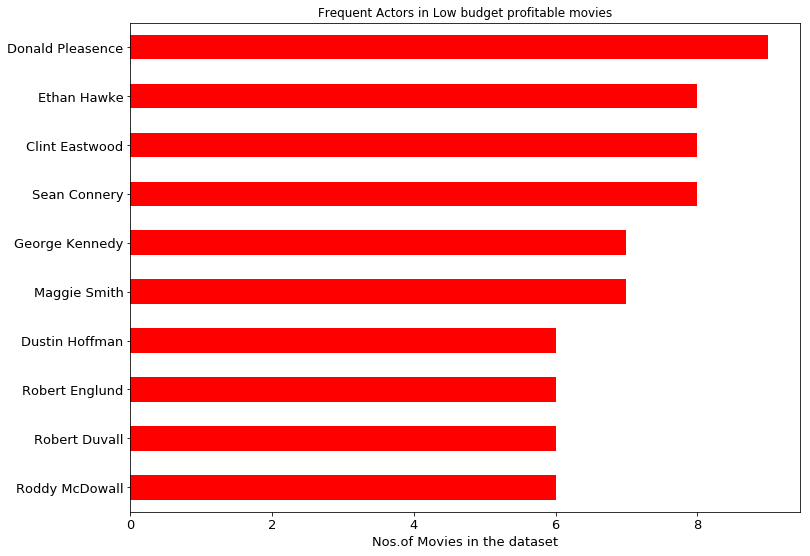

In [339]:
count = data(low_budget, 'cast', 'Frequent Actors in Low budget profitable movies')

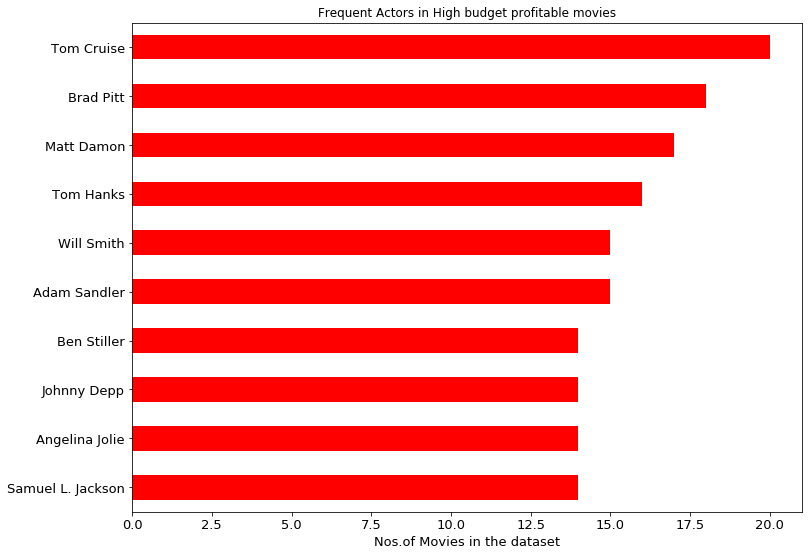

In [340]:
count = data(high_budget, 'cast', 'Frequent Actors in High budget profitable movies')

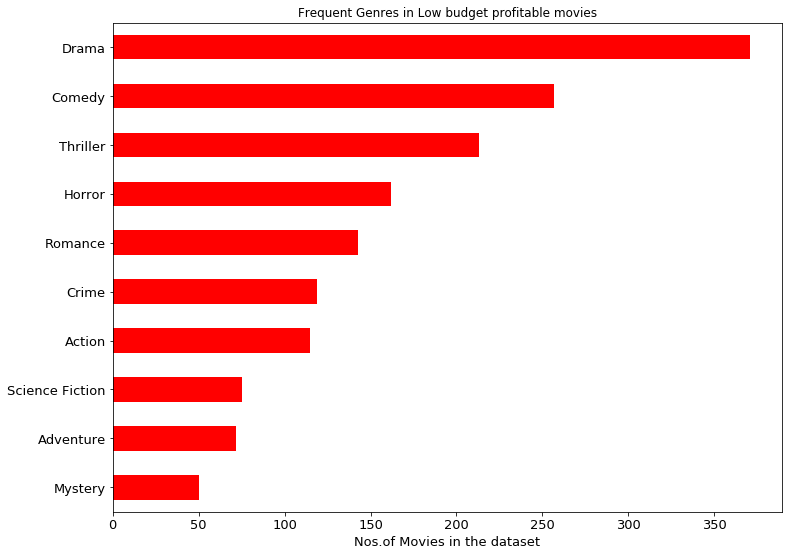

In [341]:
count = data(low_budget, 'genres', 'Frequent Genres in Low budget profitable movies')

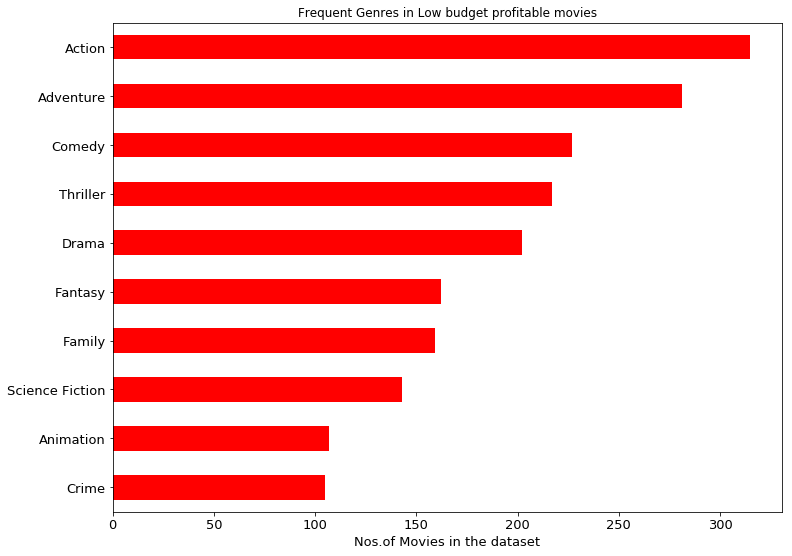

In [342]:
count = data(high_budget, 'genres', 'Frequent Genres in Low budget profitable movies')

<a id='analysis'></a>
## Conclusion:

This was a very interesting data analysis and We learnt some very interesting facts about movies. 
##### Generally an average movie has a budget of 24mn dollars and generates revenue of ~49mn dollars thereby generating a profit of 25mn dollars. However the mantra to make a successful movie (based on high profits) is as follows: 
>Average Budget must be around 40mn dollars
>Average duration of the movie must be 109 minutes
>Cast should have either : Robert De Niro, Tom Cruise, Brad Pitt, Tom Hanks or Bruce Willis
>Genre must be : Drama, Comedy, Thriller, Action or Adventure

With the above credentials a movie can earn around 160mn which is almost 400% ROI and about more than 3 times of what an average movie makes. However Low budget profitable movies make a great ROI of ~4000% with a small investment.

#### The final recommendation to movie makers would be to either 
1. Make a high budget Action, Adventure or Comedy movie with Actors like Tom Cruise, Brad pitt or Matt Damon
#### OR
2. Make a low budget Drama, Comedy or Thriller with Actors like Donald Pleasence, Ethan Hawke or Clint Eastwood



##### *** Please note there were some assumptions made and movies classified based on averages of the given dataset to be more conclusive.